# Machine Learning Assignment 3
### Name: Rabbia Waheed  
### Roll Number: 494532


# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# **Load the Data**

In [ ]:
robotic_sensor_data = pd.read_csv('/content/synthetic_robotics_sensor_data.csv')

In [ ]:
robotic_sensor_data.head()

,temperature,humidity,pressure,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,magnet_x,magnet_y,magnet_z
0,25.496714,56.996777,1006.248217,-0.190781,-0.086349,9.757624,-0.011141,0.007852,-0.000330,33.827011,56.607526,44.109102
1,24.861736,54.623168,1011.554813,-0.086039,-0.003120,9.754659,-0.006309,-0.017777,-0.005037,35.367064,58.472503,52.164252
2,25.647689,50.298152,1005.075801,-0.041361,0.001802,9.620436,-0.009421,0.007147,-0.001724,32.493450,57.013095,55.553766
3,26.523030,46.765316,1009.920385,0.188769,0.047263,9.766991,-0.005480,-0.002337,0.007147,20.287512,60.552090,53.775925
4,24.765847,53.491117,994.063853,0.055655,-0.136686,9.873283,-0.002142,0.007075,0.012779,29.222888,65.985893,55.422388


In [14]:
# --- PCA from scratch ---

# Step 1: Extract the values from the DataFrame
X = robotic_sensor_data.values  # Convert the DataFrame to a NumPy array for matrix operations

# Step 2: Center the data
X_centered = X - np.mean(X, axis=0)
"""
Subtract the mean of each column (sensor) to center the data around zero.
This is necessary to compute the correct covariance matrix.
"""

# Step 3: Compute the covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)
"""
Compute the covariance matrix of the centered data.
Each element (i, j) in this matrix shows the covariance between feature i and feature j.
"""

# Step 4: Perform eigen decomposition
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)
"""
Compute the eigenvalues and eigenvectors of the covariance matrix.
- Eigenvalues represent the amount of variance explained by each principal component.
- Eigenvectors represent the directions of those components.
"""

# Step 5: Sort eigenvalues and corresponding eigenvectors in descending order
sorted_idx = np.argsort(eigen_vals)[::-1]
eigen_vals = eigen_vals[sorted_idx]
eigen_vecs = eigen_vecs[:, sorted_idx]
"""
Sort the eigenvalues in descending order to prioritize components that explain the most variance.
Rearrange the eigenvectors to match this order.
"""

# Step 6: Calculate the explained variance ratio and cumulative variance
explained_variance_ratio = eigen_vals / np.sum(eigen_vals)
cumulative_variance = np.cumsum(explained_variance_ratio)
"""
The explained variance ratio tells us how much variance each component explains.
Cumulative variance helps determine how many components are needed to retain a desired total variance.
"""

# Step 7: Choose the number of components k to retain at least 90% variance
k = np.argmax(cumulative_variance >= 0.90) + 1
"""
Find the smallest number of components such that their cumulative explained variance is at least 90%.
"""

# Step 8: Project the original data onto the top-k eigenvectors
X_reduced = X_centered @ eigen_vecs[:, :k]
"""
Transform the data to the new k-dimensional space formed by the top-k principal components.
"""

# Step 9: Print the selected number of components
"""
Output the selected number of principal components needed to retain sufficient information.
"""
print(f"Selected k = {k} components for >90% variance")



Selected k = 5 components for >90% variance


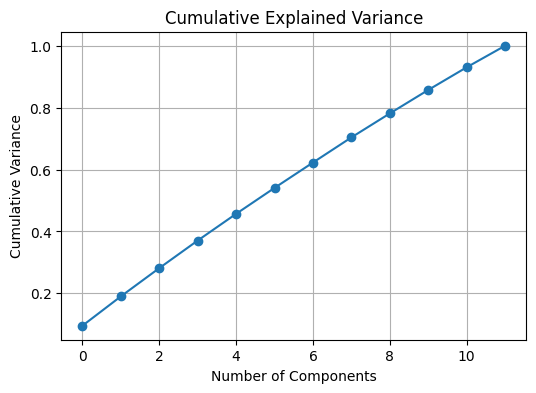

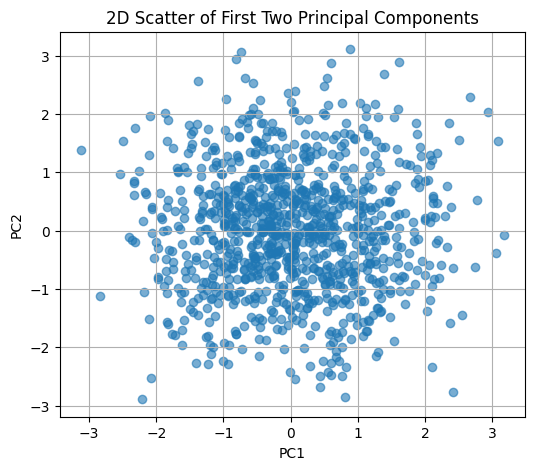

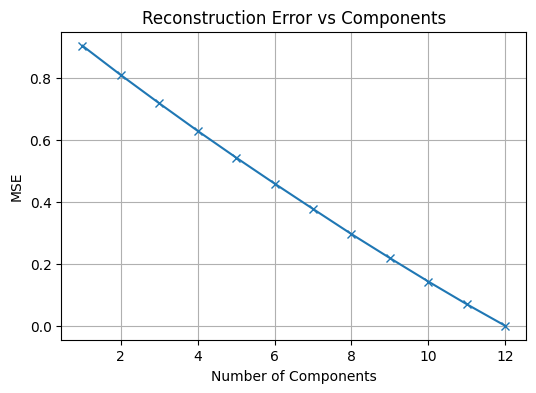

'\nPlot the reconstruction error (MSE) as a function of number of components.\nThis helps visualize the trade-off between dimensionality reduction and information loss.\n'

In [15]:
# --- PCA using scikit-learn ---

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
"""
Standardize the data to have zero mean and unit variance.
This is important for PCA, as it is sensitive to the scale of the features.
"""

# Step 2: Apply PCA to the standardized data
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
"""
Fit PCA on the standardized data and transform it into principal component space.
Each column in X_pca represents a principal component (linear combination of original features).
"""

# Step 3: Plot cumulative explained variance
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.show()
"""
This plot shows how much total variance is explained as you include more components.
Useful for deciding how many components (k) are sufficient to capture most of the data's variance.
"""

# Step 4: 2D visualization using first two principal components
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6)
plt.title('2D Scatter of First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()
"""
Scatter plot of the data projected onto the first two principal components.
Helps visualize potential clusters or patterns in reduced dimensions.
"""

# --- Reconstruction and Error Analysis ---

# Step 5: Evaluate reconstruction error as k varies
mse_list = []
for i in range(1, 13):
    pca_i = PCA(n_components=i)
    X_pca_i = pca_i.fit_transform(X_scaled)
    X_recon = pca_i.inverse_transform(X_pca_i)
    mse = mean_squared_error(X_scaled, X_recon)
    mse_list.append(mse)
"""
For each k from 1 to 12:
- Perform PCA with k components
- Reconstruct the original data from reduced form
- Compute the Mean Squared Error between original and reconstructed data
"""

# Step 6: Plot reconstruction error vs number of components
plt.figure(figsize=(6,4))
plt.plot(range(1, 13), mse_list, marker='x')
plt.title('Reconstruction Error vs Components')
plt.xlabel('Number of Components')
plt.ylabel('MSE')
plt.grid(True)
plt.show()
"""
Plot the reconstruction error (MSE) as a function of number of components.
This helps visualize the trade-off between dimensionality reduction and information loss.
"""


# **Interpretation:**
1- The curve increases steadily and reaches 100% at 12 components, meaning all the original data variance is retained by the time all components are used. Around 10 components capture over 90% of the variance, suggesting we can reduce the dataset to 10 dimensions without significant information loss.

2-The points are spread in a roughly circular pattern, suggesting the data has no clear clustering structure in the first two dimensions. However, this reduction still helps visualize high-dimensional sensor data in 2D for exploratory analysis.

3- The reconstruction error decreases sharply as more components are added. It approaches zero when all 12 components are used, showing that PCA effectively compresses and reconstructs data with minimal loss if an appropriate k is chosen (e.g., k ≥ 10).


# **Discuss how reconstruction error changes as you vary k?**
As the number of principal components k increases, the reconstruction error decreases because more information from the original data is retained. When k is small, significant variance is lost, leading to higher error and poor reconstruction quality. However, after a certain point, adding more components yields diminishing returns, as most variance has already been captured. The reconstruction error approaches zero when all components are used, indicating a near-perfect reconstruction of the original data. This highlights the trade-off between dimensionality reduction and data fidelity.

k=10: Compression Ratio=0.0391, MSE=0.0125


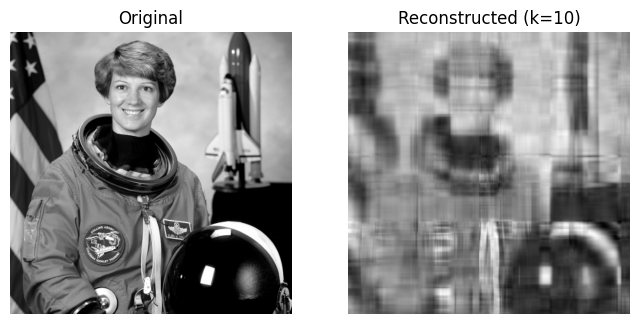

k=50: Compression Ratio=0.1955, MSE=0.0018


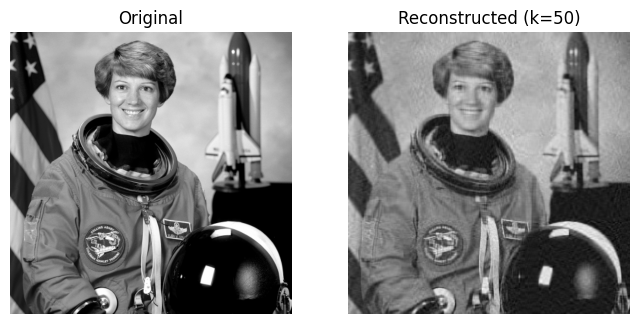

k=100: Compression Ratio=0.3910, MSE=0.0005


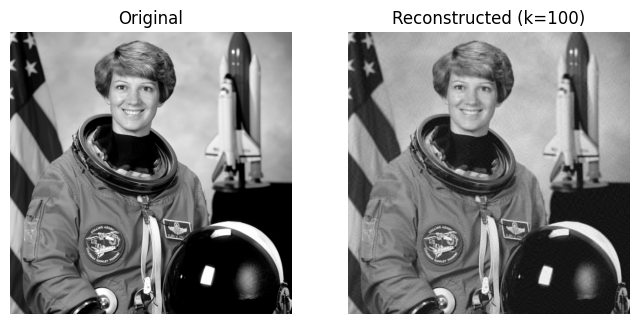

In [16]:
# ============================
# Scenario 2: SVD for Image Compression
# ============================

from skimage import data, color
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Step 1: Load and preprocess a grayscale image
image = color.rgb2gray(data.astronaut())  # Convert RGB image to grayscale
image = resize(image, (512, 512), anti_aliasing=True)  # Resize to 512x512 for SVD
"""
This loads a sample image and converts it to a 512×512 grayscale matrix.
Each value represents the intensity of a pixel (from 0 to 1).
"""

# Step 2: Perform Singular Value Decomposition (SVD)
U, S, Vt = np.linalg.svd(image, full_matrices=False)
"""
Decompose the image matrix into U, S, and V^T using NumPy's SVD.
- U: Left singular vectors
- S: Singular values (1D array)
- Vt: Right singular vectors (transposed)
"""

# Step 3: Reconstruct image using top k singular values
ks = [10, 50, 100]  # Different ranks to test
for k in ks:
    S_k = np.diag(S[:k])      # Take top k singular values and make diagonal matrix
    U_k = U[:, :k]            # Take first k columns of U
    Vt_k = Vt[:k, :]          # Take first k rows of V^T

    img_recon = U_k @ S_k @ Vt_k  # Reconstruct the image using top k components
    """
    The reconstructed image is an approximation using only the top k components.
    Higher k gives better quality but less compression.
    """

    # Step 4: Compute compression ratio and reconstruction error (MSE)
    compression_ratio = (k*(512 + 512 + 1)) / (512*512)
    mse = mean_squared_error(image, img_recon)
    """
    Compression ratio is calculated based on storage size:
    - We store U_k (512×k), S_k (k), and Vt_k (k×512)
    - Divide by the original image size (512×512)
    """

    # Step 5: Display original and reconstructed images
    print(f"k={k}: Compression Ratio={compression_ratio:.4f}, MSE={mse:.4f}")
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(img_recon, cmap='gray')
    plt.title(f'Reconstructed (k={k})')
    plt.axis('off')
    plt.show()
    """
    Visualize the effect of compression on image quality.
    Lower k gives blurrier reconstructions; higher k retains more details.
    """


# **Explain how singular value count ‘k’ impacts both image quality and storage savings.**

Reducing the singular value count k in Singular Value Decomposition (SVD) lowers the number of components used to reconstruct an image, leading to greater compression and smaller storage size, but at the cost of image quality. A smaller k keeps only the most important features of the image, which may blur fine details, while a larger k retains more detail but requires more memory. The optimal k balances quality and efficiency based on application needs.

# **Suggest scenarios in robotics / AI where such compression might be critical?**
In robotics and AI, such compression is critical in edge devices with limited memory and bandwidth—for example, onboard vision systems in drones or autonomous robots that need to transmit or store camera data efficiently. It also helps in real-time decision-making systems, where quick image processing is essential.